## Importing Necessary Libraries

In [121]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Text processing
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Date and time parsing
from dateutil import parser
# Machine learning
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Handling imbalanced data
from imblearn.over_sampling import SMOTE
# Model persistence
import joblib
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

**Loading Data**

In [122]:
# Importing two datasets netflix titles and title ratings.
movies = pd.read_csv('netflix_titles.csv')
imdb = pd.read_csv('title.ratings.tsv', sep='\t')

**Merging datasets**

In [123]:
# Merging both the datasets using merge.
df = pd.merge(left=movies, right=imdb, left_index=True, right_index=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'tconst', 'averageRating', 'numVotes'],
      dtype='object')

In [124]:
data = df.copy()

**Initial Data Inspection and Summary Statistics**

In [125]:
# Inspect the data
df.head(3)   #To print the first three rows of the dataset.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tconst,averageRating,numVotes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",tt0000001,5.7,2053
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",tt0000002,5.7,275
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,tt0000003,6.5,2009


In [126]:
df.tail(3)   #To print the Last three rows of the dataset.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tconst,averageRating,numVotes
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,tt0023158,7.5,4635
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",tt0023159,5.9,16
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,tt0023160,5.5,59


In [127]:
df.describe(include='all')   #For summary statistics for all columns, including categorical ones


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tconst,averageRating,numVotes
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807,8807,8807.000000,8807.000000
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775,8807,NaN,NaN
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",tt0000001,NaN,NaN
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN,NaN,5.955626,525.568639
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN,NaN,1.032444,4882.017396
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,5.400000,21.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,6.000000,43.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,6.700000,165.000000


In [128]:
df.info()    #Summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        8807 non-null   object 
 1   type           8807 non-null   object 
 2   title          8807 non-null   object 
 3   director       6173 non-null   object 
 4   cast           7982 non-null   object 
 5   country        7976 non-null   object 
 6   date_added     8797 non-null   object 
 7   release_year   8807 non-null   int64  
 8   rating         8803 non-null   object 
 9   duration       8804 non-null   object 
 10  listed_in      8807 non-null   object 
 11  description    8807 non-null   object 
 12  tconst         8807 non-null   object 
 13  averageRating  8807 non-null   float64
 14  numVotes       8807 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+ MB


## Data Cleaning

In [129]:
# df = merged_data[~merged_data['rating'].str.contains('88 min|83 min|82 min')]

In [130]:
# Duplicate Value Count
print(f"Duplicate rows: {len(df[df.duplicated()])}")


Duplicate rows: 0


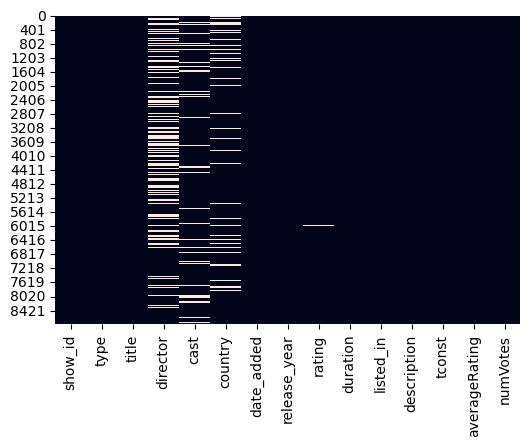

In [131]:
# Null Value Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [132]:
# Checking number of null values
print(df.isnull().sum())

show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
duration            3
listed_in           0
description         0
tconst              0
averageRating       0
numVotes            0
dtype: int64


In [133]:
#DEALING WITH MISSING VALUES
df['cast'] = df['cast'].fillna('Unavailable')
df['director'] = df['director'].fillna('Unavailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
tconst           0
averageRating    0
numVotes         0
dtype: int64

## 2. Data Wrangling Operations
**2.1 Feature Engineering**

In [134]:
from dateutil import parser
df['date_added'] = df['date_added'].apply(lambda x: parser.parse(x, fuzzy=True) if pd.notnull(x) else None)
df['data_added_day'] = df['date_added'].dt.day
df['data_added_month'] = df['date_added'].dt.month
df['data_added_year'] = df['date_added'].dt.year
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'tconst', 'averageRating', 'numVotes', 'data_added_day',
       'data_added_month', 'data_added_year'],
      dtype='object')

In [135]:
data = df.copy()

In [136]:
# # Extract date features
# df['data_added_day'] = df['date_added'].dt.day
# df['data_added_month'] = df['date_added'].dt.month
# df['data_added_year'] = df['date_added'].dt.year
df['release_month'] = pd.to_datetime(df['release_year'], format='%Y').dt.month
df['time_gap'] = df['data_added_month'] - df['release_month']
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'tconst', 'averageRating', 'numVotes', 'data_added_day',
       'data_added_month', 'data_added_year', 'release_month', 'time_gap'],
      dtype='object')

In [137]:
# Text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

In [138]:
df['combined_features'] = df['title'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']
df['combined_features'] = df['combined_features'].apply(clean_text)
df['combined_features'][2]

'gangland julien leclercq sami bouajila tracy gotoas samuel jouy nabiha akkari sofia lesaffre salim kechiouche noureddine farihi geert van rampelberg bakary diombera crime tv show international tv show tv action adventure protect family powerful drug lord skilled thief mehdi expert team robber pulled violent deadly turf war'

## 3. Descriptive Analytics
**3.1 Distribution of Movies and TV Shows**

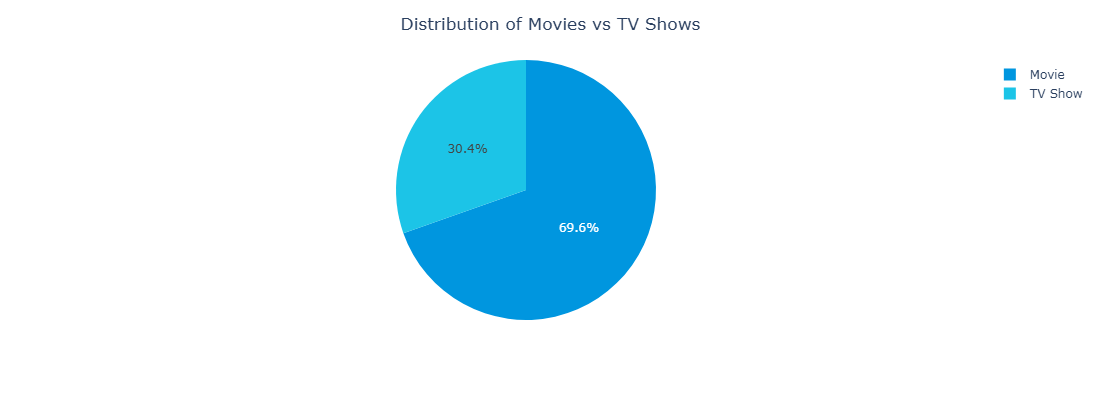

In [139]:
# Define custom colors
custom_colors = ['#0096df', '#1cc4e7']  # Blue and orange

# Create pie chart with custom colors
fig = px.pie(df, names='type', width=600, height=400, color_discrete_sequence=custom_colors)
fig.update_layout(title='Distribution of Movies vs TV Shows', title_x=0.5)

# Show the plot
fig.show()

## Top 10 Countries

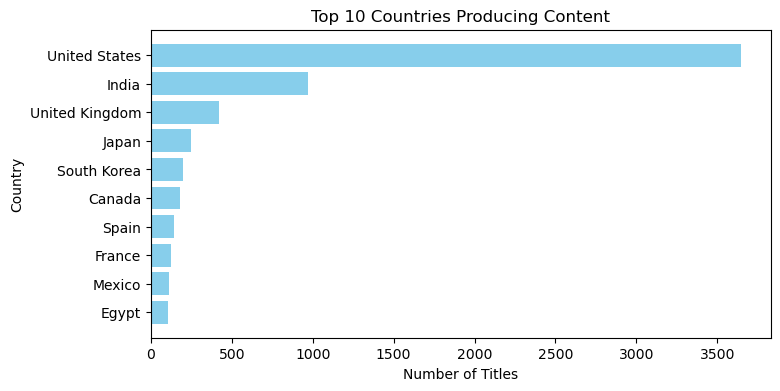

In [140]:
from collections import Counter

countries_dict = df['country'].dropna().tolist()  # Convert country column to list, remove NaN values
top_ten = Counter(countries_dict).most_common(10)
country = [_[0] for _ in top_ten]
count = [_[1] for _ in top_ten]

plt.figure(figsize=(8, 4))
plt.barh(country[::-1], count[::-1], color='skyblue')  # Reverse the order of lists
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries Producing Content')
plt.show()

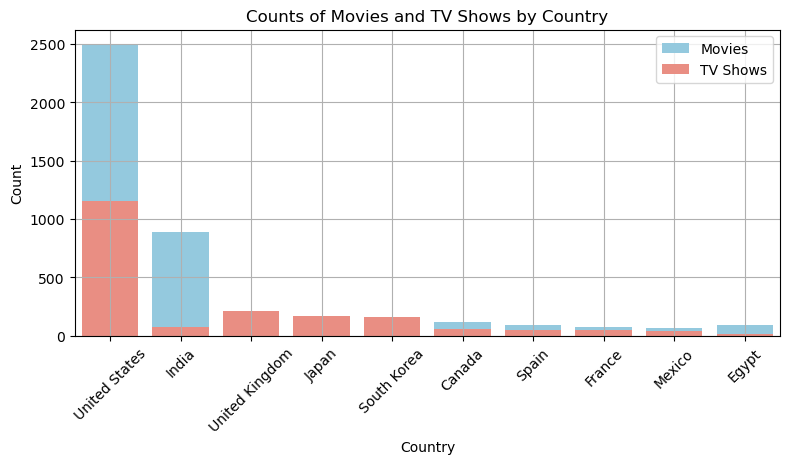

In [141]:
country_order = df['country'].value_counts()[:10].index
country_vs_content = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order].reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=country_vs_content, x='country', y='Movie', color='skyblue', label='Movies')
sns.barplot(data=country_vs_content, x='country', y='TV Show', color='salmon', label='TV Shows')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Counts of Movies and TV Shows by Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


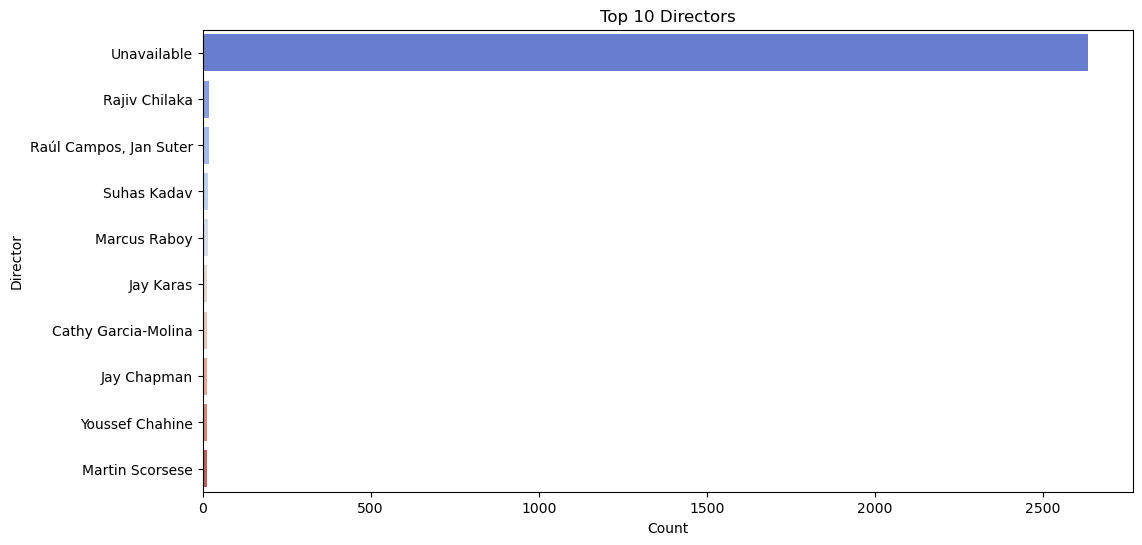

In [142]:
# Top directors in the dataset
top_directors = data['director'].dropna().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

**3.3 Most Common Genere**

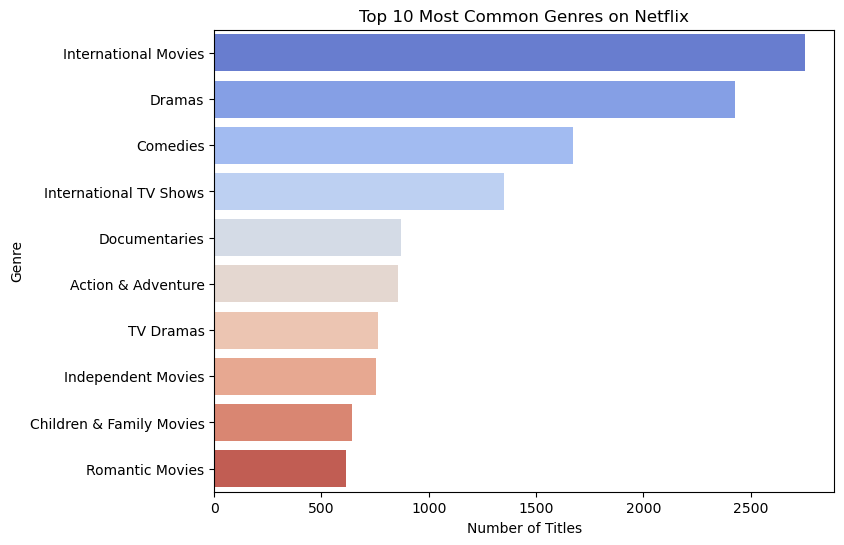

In [143]:
# Split and count genres
genres = df['listed_in'].str.split(',').apply(lambda x: [i.strip() for i in x])
all_genres = [genre for sublist in genres for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)
# Plotting the most common genres
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="coolwarm", orient='horizontal')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


**3.4 Pairwise Analysis**
: movie release year, number of votes and the average rating 

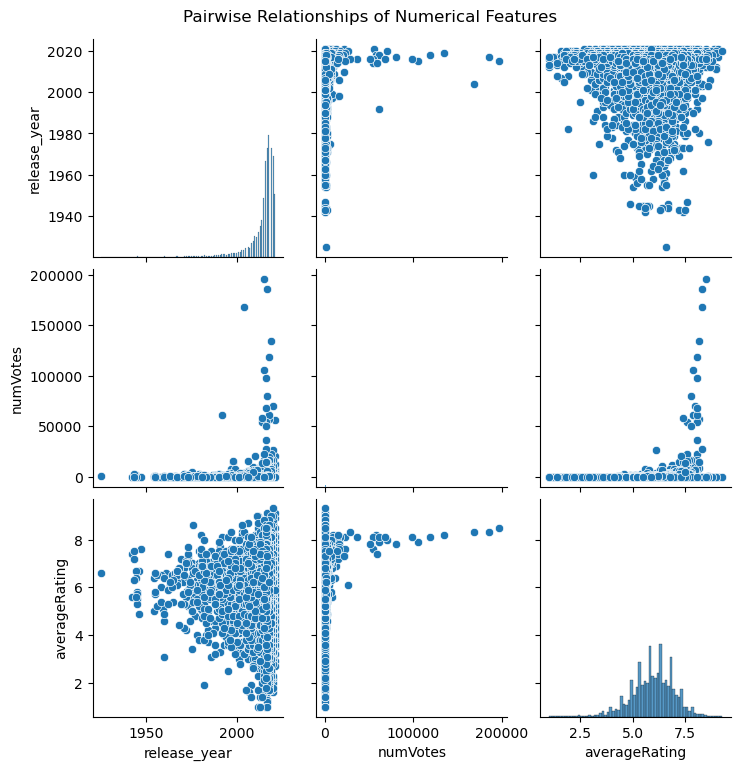

In [144]:
pair_plot = sns.pairplot(df[['release_year', 'numVotes', 'averageRating']])
pair_plot.fig.suptitle('Pairwise Relationships of Numerical Features', y=1.02)  # Set title on top
plt.show()

**3.5 IMDb Ratings by Genre**

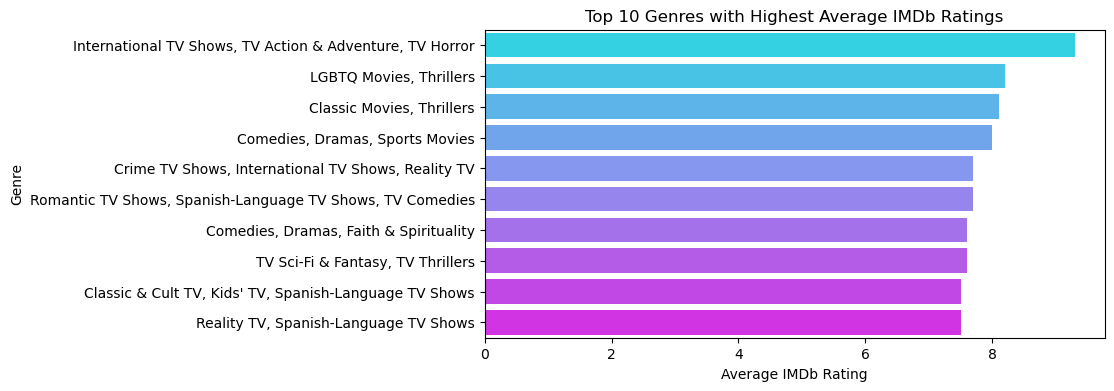

In [145]:
# Ensure that the dataset has the 'listed_in' and 'averageRating' columns

# Extract and count average ratings by genre
# Split the genres into individual rows for each genre
genre_ratings = df[['listed_in', 'averageRating']].explode('listed_in')
genre_ratings['listed_in'] = genre_ratings['listed_in'].str.strip()

# Group by genre and calculate the mean average rating
genre_ratings = genre_ratings.groupby('listed_in')['averageRating'].mean()

# Sort genres by average rating in descending order and select the top 10
top_10_genres = genre_ratings.sort_values(ascending=False).head(10)

# Plotting the average ratings by genre
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='cool')
plt.title('Top 10 Genres with Highest Average IMDb Ratings')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
plt.show()


**3.6 Content rating**

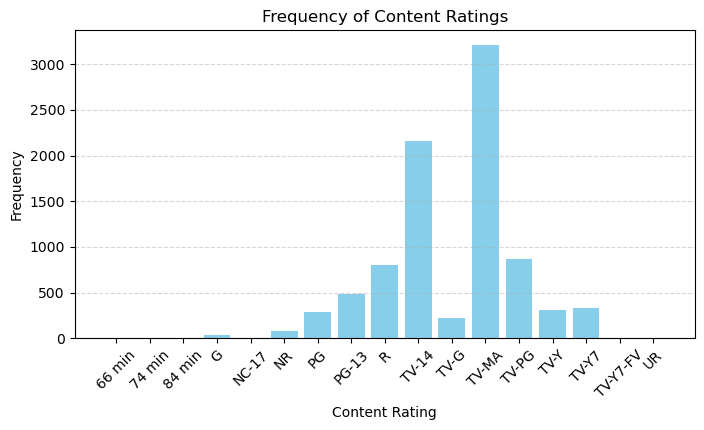

In [146]:
# Assuming 'df' is your DataFrame with the dataset, and 'rating' is the column containing content ratings
# Create a frequency table for content ratings
rating_freq = df['rating'].value_counts().sort_index()
# Plot a histogram for content ratings
plt.figure(figsize=(8, 4))
plt.bar(rating_freq.index, rating_freq.values, color='skyblue')
plt.title('Frequency of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for y-axis
plt.show()


**Release year Trends by Type**

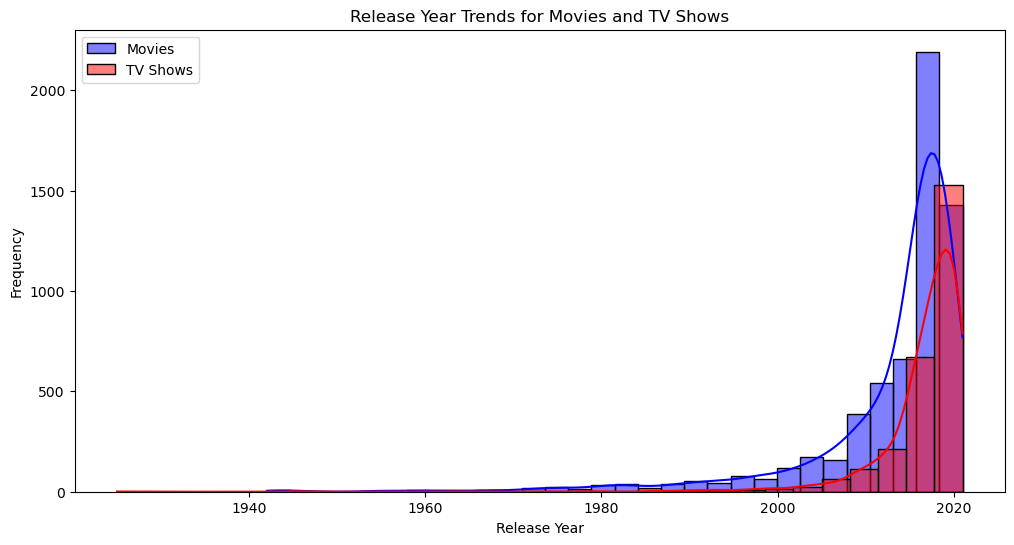

In [147]:
# Plotting the trends in release years
plt.figure(figsize=(12, 6))
sns.histplot(df[df['type'] == 'Movie']['release_year'], kde=True, color='blue', label='Movies', bins=30)
sns.histplot(df[df['type'] == 'TV Show']['release_year'], kde=True, color='red', label='TV Shows', bins=30)
plt.title('Release Year Trends for Movies and TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Word Cloud of Movie Titles**

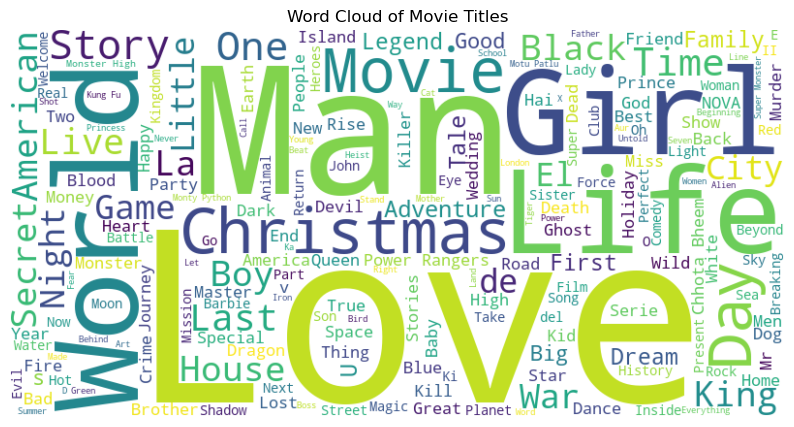

In [148]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()


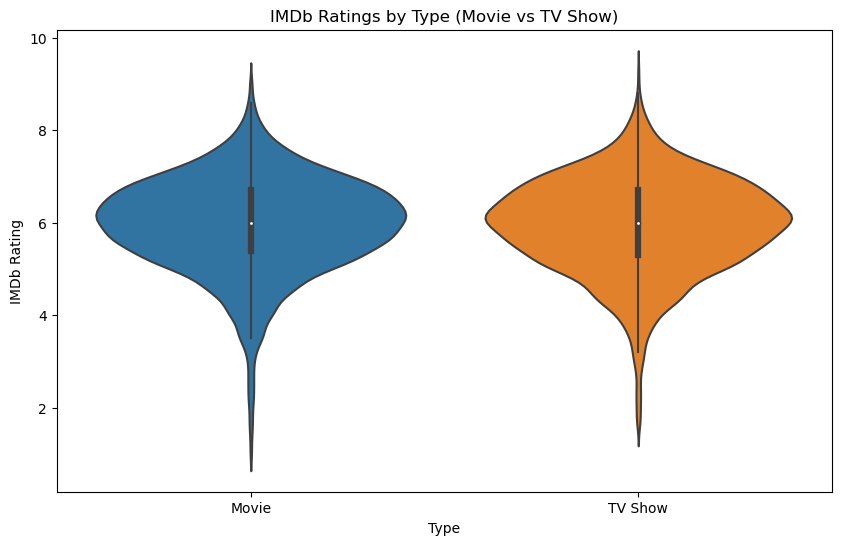

In [149]:
# Visualize distribution of numerical variables using violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='averageRating', data=df)
plt.title('IMDb Ratings by Type (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('IMDb Rating')
plt.show()


In [150]:
# import plotly.graph_objs as go

# # Define data for map trace
# map_trace = go.Choropleth(
#     locations=df['country'],  # Country names
#     locationmode='country names',  # Set location mode to country names
#     z=df['type'].map({'Movie': 1, 'TV Show': 0}),  # Assign numerical values to represent movie and TV show
#     colorscale=[[0, 'blue'], [1, 'red']],  # Custom colorscale for movies (blue) and TV shows (red)
#     colorbar=dict(title='Type(Movie: Blue, TV Show: Red)'),  # Title for colorbar
#     hoverinfo='location+z',  # Display country name and type on hover
# )

# # Define layout for map
# layout = go.Layout(
#     title='Distribution of Movies vs TV Shows',  # Title of the map
#     title_x=0.5,  # Center the title
#     geo=dict(
#         showframe=False,  # Hide frame around map
#         projection=dict(type='natural earth')  # Set projection type
#     )
# )

# # Create figure object
# fig = go.Figure(data=map_trace, layout=layout)

# # Show the map
# fig.show()


## 4. Diagnostic Analytics 

**Trends of Adding Movies and TV Shows Over Days in Different Years**

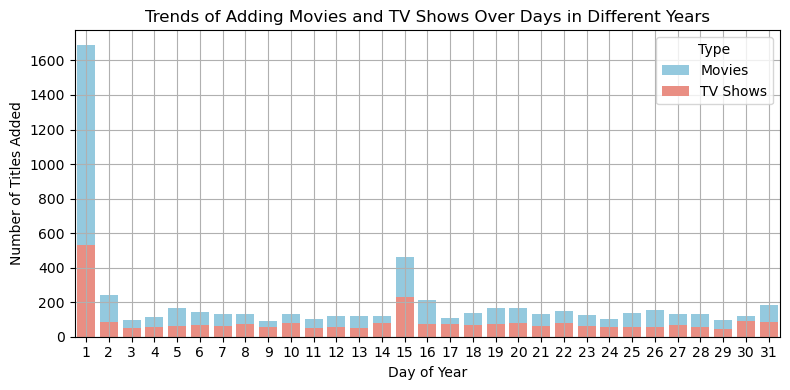

In [151]:
# Grouping data by type and day of addition, then counting the occurrences
type_counts = df.groupby(['type', 'data_added_day']).size().reset_index(name='count')
# Filter data for movies and TV shows separately
movies_data = type_counts[type_counts['type'] == 'Movie']
tv_shows_data = type_counts[type_counts['type'] == 'TV Show']
# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=movies_data, x='data_added_day', y='count', color='skyblue', label='Movies')
sns.barplot(data=tv_shows_data, x='data_added_day', y='count', color='salmon', label='TV Shows')
plt.title('Trends of Adding Movies and TV Shows Over Days in Different Years')
plt.xlabel('Day of Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Trends of Adding Movies and TV Shows Over Time** 

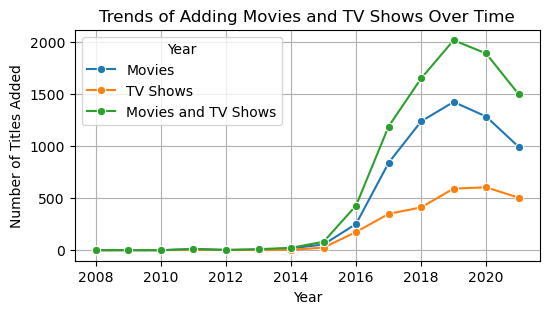

In [152]:

# Count the number of entries and group by year and type (movie/TV show).
type_counts = df.groupby(['type', 'data_added_year']).size().reset_index(name='count')
# Calculating the total count of entries per year
total_data = type_counts.groupby('data_added_year')['count'].sum().reset_index()
# Separately filter data for TV series and movies.
movies_data = type_counts[type_counts['type'] == 'Movie']
tv_shows_data = type_counts[type_counts['type'] == 'TV Show']
# Plotting
plt.figure(figsize=(6, 3))
# Plot line graph for movies data
sns.lineplot(data=movies_data, x='data_added_year', y='count', marker='o', label='Movies')
# Plot line graph for TV shows data
sns.lineplot(data=tv_shows_data, x='data_added_year', y='count', marker='o', label='TV Shows')
# Plot line graph for total data (movies and TV shows combined)
sns.lineplot(data=total_data, x='data_added_year', y='count', marker='o', label='Movies and TV Shows')
# Set plot title and axis labels
plt.title('Trends of Adding Movies and TV Shows Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
# Add legend and grid
plt.legend(title='Year')
plt.grid(True)
# Display the plot
plt.show()


**Hypothesis Testing**

In [153]:
from scipy.stats import ttest_ind

# Extract IMDb ratings for movies and TV shows
movies_ratings = df[df['type'] == 'Movie']['averageRating']
tvshows_ratings = df[df['type'] == 'TV Show']['averageRating']

# Drop any missing values in the ratings
movies_ratings.dropna(inplace=True)
tvshows_ratings.dropna(inplace=True)

# Perform a t-test
t_stat, p_value = ttest_ind(movies_ratings, tvshows_ratings, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Hypothesis testing result
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference in IMDb ratings between movies and TV shows.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference in IMDb ratings between movies and TV shows.")


T-statistic: 0.7692603043716981
P-value: 0.4417741488145337
Fail to reject the null hypothesis - There is no significant difference in IMDb ratings between movies and TV shows.


In [154]:
data = df.copy()

In [155]:
rec_data = data.copy()
# creating a bag of words
rec_data['bag'] =rec_data['director'] + ' ' + rec_data['cast'] + ' ' + rec_data['listed_in'] + ' ' + rec_data['description']
# applying clean text function
rec_data['bag'] = rec_data['bag'].apply(clean_text)
# printing the first row of the cleaned text
rec_data.iloc[1,]['bag']

'unavailable ama qamata khosi ngema gail mabalane thabang molaba dillon windvogel natasha thahane arno greeff xolile tshabalala getmore sithole cindy mahlangu ryle de morny greteli fincham sello maake kancube odwa gwanya mekaila mathys sandi schultz duane williams shamilla miller patrick mofokeng international tv show tv drama tv mystery crossing path party cape town teen set prove whether privateschool swimming star sister abducted birth'

## Text Vectorization

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
# #using tfidf

tfidf = TfidfVectorizer(stop_words='english',max_features=20000)
tfidf_m = tfidf.fit_transform(rec_data['bag'])
tfidf_m

<8807x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 252804 stored elements in Compressed Sparse Row format>

## Dimesionality Reduction

In [157]:
from sklearn.decomposition import PCA

pca_tuned = PCA(n_components=5000)
x_dense = tfidf_m.toarray()
pca_tuned.fit(x_dense)
x = pca_tuned.transform(x_dense)
print(x.shape)

(8807, 5000)


In [158]:
rec_data['title'].shape

(8807,)

## Machine Learning Model -K-MEANS CLUSTERING


In [159]:
# K-means clustering
k = 200
kmeans = MiniBatchKMeans(n_clusters=k)
kmeans.fit(x)
rec_data['cluster'] = kmeans.predict(x)

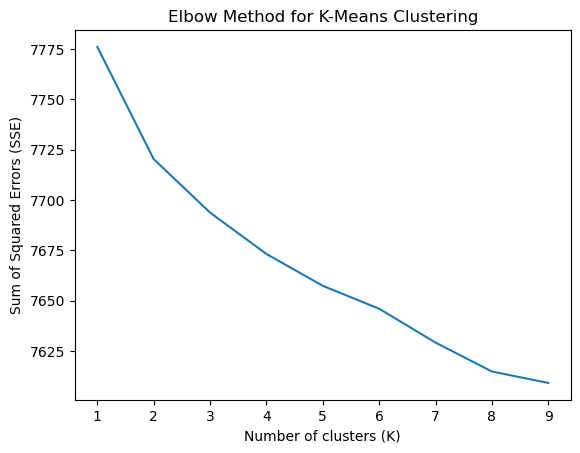

In [160]:
from sklearn.cluster import KMeans

# Create a list to store the sum of squared errors for each K value
Sum_of_Squared_Errors = []

# Iterate over range of K values and compute SSE for each value
for k in range(1, 10):
    # Initialize the k-means model with the current value of K
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Compute the sum of squared errors for the model
    Sum_of_Squared_Errors.append(kmeans.inertia_)

# Plot the SSE values against the range of K values
plt.plot(range(1, 10), Sum_of_Squared_Errors)
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [161]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering_model(model, data, labels):
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)  # Convert to dense array
    calinski_harabasz = calinski_harabasz_score(data, labels)  # Convert to dense array
     # Print the evaluation results
    print(f"Number of clusters: {k}")
    print(f"Silhouette score: {silhouette:.4f}")
    print(f"Calinski-Harabasz score: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin score: {davies_bouldin:.4f}")

    return {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": davies_bouldin,
        "Calinski-Harabasz Index": calinski_harabasz
    }



In [162]:
y_kmeans = kmeans.predict(x)# Predict on the model
labels = kmeans.labels_     # Get the cluster labels for each point in the data
unique_labels = np.unique(labels) # Get the unique cluster labels
df['kmeans_cluster'] = labels
scores_dict_kmeans = evaluate_clustering_model(kmeans, x , y_kmeans)


Number of clusters: 9
Silhouette score: 0.0062
Calinski-Harabasz score: 24.1117
Davies-Bouldin score: 11.9538


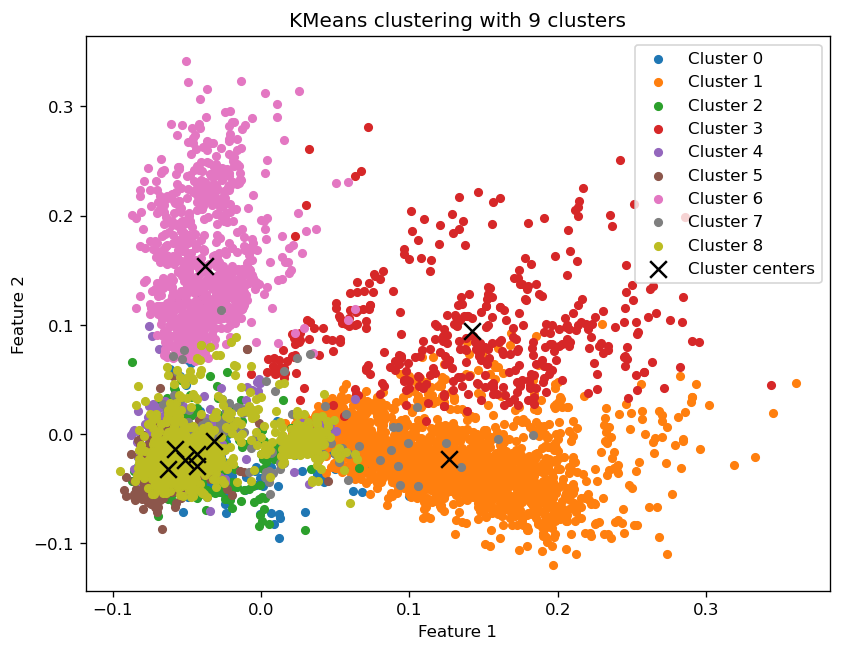

In [163]:
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels:
    plt.scatter(x[labels == i, 0], x[labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='x', c='black', label='Cluster centers')
plt.title('KMeans clustering with {} clusters'.format(len(unique_labels)))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [164]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import pairwise_distances


def get_recommendation(root):
    try:
        # Find the index of the movie in the DataFrame
        idx = rec_data[rec_data['title'].str.lower() == root.lower()].index
        if idx.empty:
            raise ValueError(f"No movie with the title '{root}' found.")
        idx = idx[0]

        # Get the cluster of the movie
        cluster = rec_data.loc[idx, 'cluster']
        
        # Filter movies from the same cluster
        cluster_movies = rec_data[rec_data['cluster'] == cluster]
        
        # Calculate pairwise cosine similarities within the cluster
        cosine_similarities = linear_kernel(tfidf_m[idx:idx+1], tfidf_m[cluster_movies.index]).flatten()
        
        # Get the indices of movies sorted by similarity (excluding the input movie)
        related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != 0]
        
        # Get the distances for the top similar documents
        distances = pairwise_distances(tfidf_m[idx:idx+1], tfidf_m[cluster_movies.index[related_docs_indices[:10]]], metric='cosine').flatten()
        
        # Return both the titles and distances
        return cluster_movies.iloc[related_docs_indices[:5]]['title'], distances
    except ValueError as e:
        print(e)
        return None, None

In [165]:
# Input movie name
name = input("Please enter a movie name: ")

# Example usage
result1, distances1 = get_recommendation(name)

if result1 is not None and distances1 is not None:
    print(f"Top recommendations for '{name}':")
    for i, (title, distance) in enumerate(zip(result1, distances1), 1):
        print(f"{i:>2}. {title:<30} Distance: {distance:.4f}")
else:
    print(f"No recommendations found for '{name}'.")

Please enter a movie name:  zoom


Top recommendations for 'zoom':
 1. Zoom                           Distance: 0.0000
 2. Hedgehogs                      Distance: 0.8960
 3. The Last Laugh                 Distance: 0.8990
 4. Snow Day                       Distance: 0.8994
 5. Dr. Seuss' The Cat in the Hat  Distance: 0.9082


## ML Cosine Similarity

In [166]:
cosine_sim = cosine_similarity(tfidf_m, tfidf_m)
cosine_sim.shape

(8807, 8807)

In [167]:
def get_recommendations(title, cosine_sim):
    # Convert title to lowercase for case-insensitive matching
    title = title.lower()
    # Get the index of the movie that matches the title
    idx = rec_data.index[rec_data['title'].str.lower() == title].tolist()
    if not idx:
        raise ValueError(f"No movie with the title '{title}' found.")
    idx = idx[0]
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return rec_data['title'].iloc[movie_indices]
name_of_mov = input("Please enter a movie name: ")
# Example usage
try:
    recommendations = get_recommendations(name_of_mov, cosine_sim)
    print(f"Top recommendations for {name_of_mov}")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
except ValueError as e:
    print(e)


Please enter a movie name:  pk


Top recommendations for pk
1. 3 Idiots
2. Sanju
3. Taare Zameen Par
4. Andaz Apna Apna
5. Dil Chahta Hai


In [168]:
## Best

In [169]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,woman,wong,work,world,writer,wu,yang,year,york,young
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Encoding**

In [170]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
# df['director_encoded'] = label_encoder.fit_transform(df['director'].astype(str))
df = pd.get_dummies(df, columns=['country'], prefix='country')
df['rating_encoded'] = label_encoder.fit_transform(df['rating'].astype(str))

In [171]:
df.drop(columns=['type', 'director', 'date_added', 'rating', 'listed_in', 'description','combined_features'], inplace=True)
df.dropna(inplace=True)

In [172]:
# Define features and target variable
y = df['data_added_month']
X = df.drop(columns=['data_added_month', 'show_id', 'title', 'cast', 'duration', 'tconst','release_month'])

In [173]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(y_res.value_counts())

data_added_month
9     827
8     827
7     827
6     827
5     827
4     827
3     827
2     827
1     827
12    827
11    827
10    827
Name: count, dtype: int64


In [174]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



In [175]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
# Evaluate model
y_pred = rf_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.94      0.92       182
           2       0.89      0.93      0.91       155
           3       0.87      0.85      0.86       164
           4       0.79      0.85      0.82       147
           5       0.87      0.73      0.80       162
           6       0.79      0.83      0.81       170
           7       0.75      0.86      0.80       165
           8       0.84      0.75      0.79       163
           9       0.96      0.83      0.89       163
          10       0.89      0.92      0.90       160
          11       0.91      0.94      0.92       175
          12       0.98      0.97      0.98       179

    accuracy                           0.87      1985
   macro avg       0.87      0.87      0.87      1985
weighted avg       0.87      0.87      0.87      1985



**deploying**

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib  # Import joblib here

# Assuming rf_classifier and tfidf_vectorizer are defined somewhere in your code
# Save the model and TF-IDF vectorizer
joblib.dump(rf_classifier, 'rf_classifier.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Month mapping
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

# Function to clean text
def clean_text(text):
    # Implement your text cleaning process here
    return text

# Function to make predictions
def make_prediction(title, director, cast, listed_in, description, content_type, country, release_year, rating, duration):
    combined_features = (title + ' ' +
                         director + ' ' +
                         cast + ' ' +
                         listed_in + ' ' +
                         clean_text(description))
    
    tfidf_features = tfidf_vectorizer.transform(['combined_features'])
    tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    
    additional_features = {
        'type_encoded': 0 if content_type == 'Movie' else 1,
        'release_year': release_year,
        'rating_encoded': -1,  # Replace with actual encoding if needed
        'duration': duration,
        'country_' + country: 1
    }
    
    additional_df = pd.DataFrame(additional_features, index=[0])
    
    for col in [col for col in df.columns if col.startswith('country_') and col != 'country_' + country]:
        additional_df[col] = 0
    
    input_df = pd.concat([additional_df, tfidf_df], axis=1)
    
    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    
    input_df = input_df[X.columns]
    
    prediction = rf_classifier.predict(input_df)
    predicted_month = month_mapping.get(int(prediction[0]), "Unknown")
    
    print("According to the given data, the best month to release new content is:", predicted_month)

# Define function to take input and make predictions
def get_user_input():
    # Get input from the user
    title = input("Enter the title: ")
    director = input("Enter the director: ")
    cast = input("Enter the cast: ")
    listed_in = input("Enter the listed in: ")
    description = input("Enter the description: ")
    content_type = input("Enter the content type (Movie/TV Show): ")
    country = input("Enter the country: ")
    release_year = int(input("Enter the uploaded Year: "))
    rating = input("Enter the rating: ")
    duration = input("Enter the duration: ")
    
    # Call the function to make predictions
    make_prediction(title, director, cast, listed_in, description, content_type, country, release_year, rating, duration)

# Call the function to take input and make predictions
get_user_input()


Enter the title:  robort 4
Enter the director:  james bond
Enter the cast:  salman khan
Enter the listed in:  comide, sci-fri
Enter the description:  this movie is based on the science
Enter the content type (Movie/TV Show):  Movie
Enter the country:  India
Enter the uploaded Year:  2024
Enter the rating:  TV-MA
Enter the duration:  60 min


According to the given data, the best month to release new content is: January


## number of movies based on the month chart

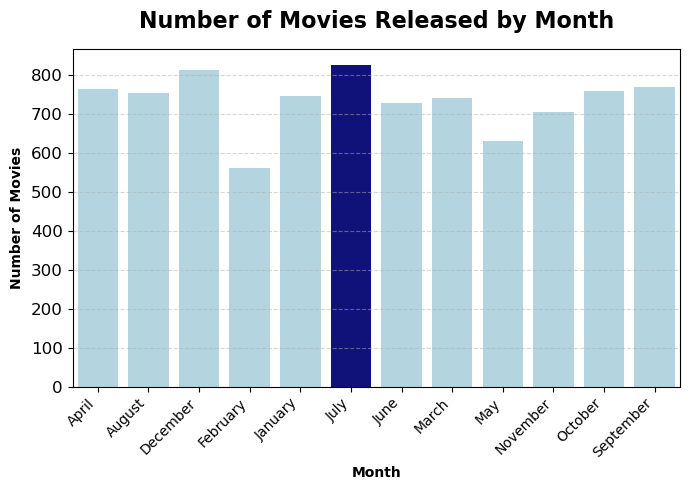

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month from date_added and map to month names
data['date_added_month'] = data['date_added'].dt.month.map({
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
})

# Count the number of movies in each month
movies_by_month = data['date_added_month'].value_counts().sort_index()

# Define custom color palette
max_count_month = movies_by_month.idxmax()
custom_palette = ['lightblue' if month != max_count_month else 'darkblue' for month in movies_by_month.index]

# Plotting
plt.figure(figsize=(7, 5))
sns.barplot(x=movies_by_month.index, y=movies_by_month.values, palette=custom_palette)
plt.xlabel('Month', fontsize=10, fontweight='bold')  # Font size and weight for x-axis label
plt.ylabel('Number of Movies', fontsize=10, fontweight='bold', labelpad=5)  # Font size and weight for y-axis label
plt.title('Number of Movies Released by Month', fontsize=16, fontweight='bold', pad=15)  # Font size and weight for title
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Top 10 Best movies based on IMDB Rating

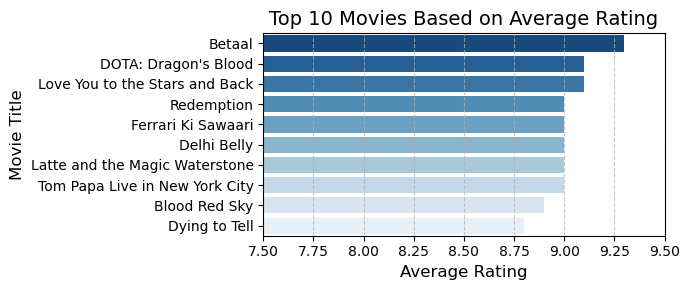

In [179]:
sorted_df = data.sort_values(by='averageRating', ascending=False)

# Select the top 10 movies
top_10_movies = sorted_df.head(10)

# Plotting
plt.figure(figsize=(7, 3))
sns.barplot(x='averageRating', y='title', data=top_10_movies, palette='Blues_r')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top 10 Movies Based on Average Rating', fontsize=14)
plt.xlim(7.5, 9.5)  # Adjust x-axis limits for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()